# Statistical & Machine Learning Methods Assignment

## Time Series Tasks

### 1. Convert the longitudinal blood pressure measurements into a proper time series

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# load the datasets
longitudinal_df = pd.read_csv('patient_longitudinal.csv', sep='\t')

# convert 'visit_date' to datetime format
longitudinal_df['visit_date'] = pd.to_datetime(longitudinal_df['visit_date'],format='%Y-%m-%d')

# check for missing values in each column
missing_values = longitudinal_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# there is no missing values found in each column
# interpolate missing values linearly
longitudinal_df['bp_systolic'] = longitudinal_df['bp_systolic'].interpolate(method='linear')
longitudinal_df['bp_systolic'] = longitudinal_df['bp_systolic'].interpolate(method='linear')

# check for duplicates rows
duplicate_count = longitudinal_df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_count}")

# there is no duplicates found in this dataset
# Drop duplicates 
longitudinal_df = longitudinal_df.drop_duplicates(subset=['patient_id', 'visit_date'])

# set 'visit_date' as the index
longitudinal_df.set_index('visit_date', inplace=True)

# aggregate duplicates
longitudinal_df = longitudinal_df.groupby(['patient_id', longitudinal_df.index]).mean()



After converting the data into a time series, we found that there were no duplicate rows or missing values. However, we included code to remove duplicates and handle missing values to ensure robustness in case of future data variations

### 2. Analyze blood pressure trends

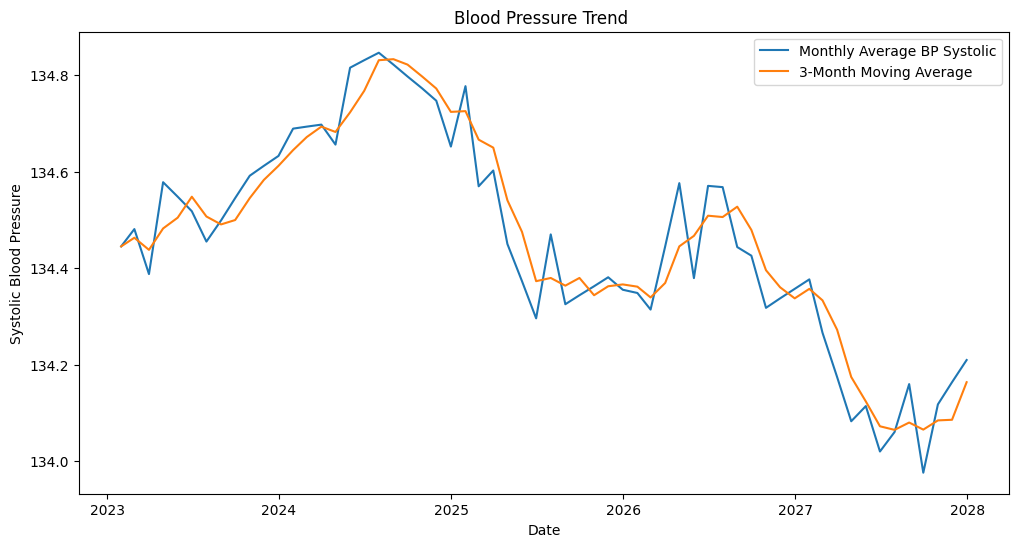

In [36]:
import matplotlib.pyplot as plt

# load the datasets
longitudinal_df = pd.read_csv('patient_longitudinal.csv', sep='\t')

# convert 'visit_date' to datetime format
longitudinal_df['visit_date'] = pd.to_datetime(longitudinal_df['visit_date'],format='%Y-%m-%d')

# set 'visit_date' as the index
longitudinal_df.set_index('visit_date', inplace=True)

# Interpolate to fill any missing values in 'bp_systolic'
longitudinal_df['bp_systolic'] = longitudinal_df['bp_systolic'].interpolate(method='linear')

# resample the data to monthly frequency using mean aggregation
monthly_bp = longitudinal_df['bp_systolic'].resample('ME').mean()

# Interpolate to fill any missing months
monthly_bp = monthly_bp.interpolate(method='linear')

# Calculate a 3-month moving average to smooth out short-term fluctuations
monthly_bp_smoothed = monthly_bp.rolling(window=3, min_periods=1).mean()

# Calculate the exponential weighted moving average with a span of 3 months
monthly_bp_ewm = monthly_bp.ewm(span=3, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_bp, label='Monthly Average BP Systolic')
plt.plot(monthly_bp_smoothed, label='3-Month Moving Average')
plt.title("Blood Pressure Trend ")
plt.xlabel("Date")
plt.ylabel("Systolic Blood Pressure")
plt.legend()
plt.show()

## Statistical Modeling Tasks

### 1. Analyze factors affecting baseline blood pressure

                            OLS Regression Results                            
Dep. Variable:            bp_systolic   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     149.1
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          6.36e-100
Time:                        08:41:10   Log-Likelihood:                -3700.7
No. Observations:                1000   AIC:                             7411.
Df Residuals:                     995   BIC:                             7436.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.4929      1.979     54.812      0.0

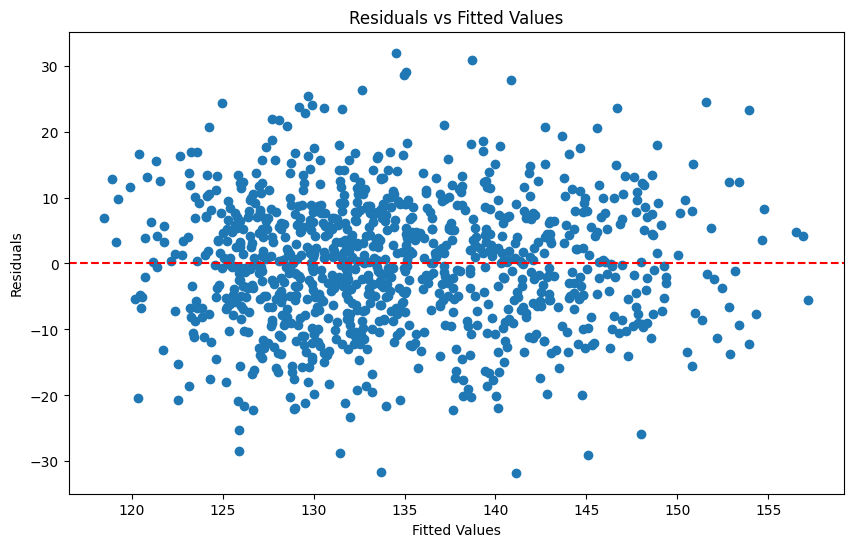

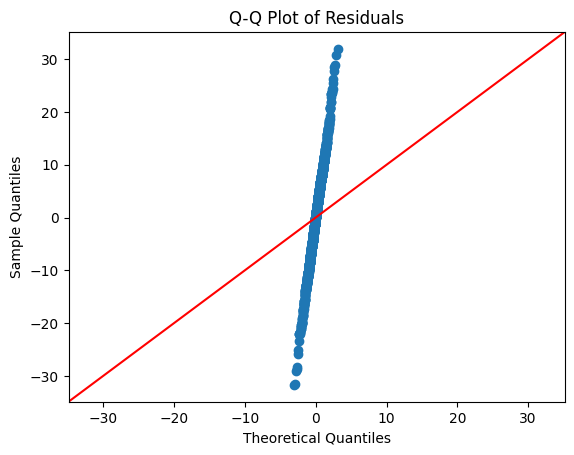

In [37]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# load the datasets
baseline_df = pd.read_csv('patient_baseline.csv', sep='\t')

# create target variable - y and predictors - X
y = baseline_df['bp_systolic']
X = baseline_df[['age', 'bmi', 'smoking', 'diabetes']]

# add constant term
X = sm.add_constant(X)

# fit the OLS model with robust standard errors with HC3 covariance type
model = sm.OLS(y, X).fit(cov_type='HC3')

# print summary
print(model.summary())

# Residuals vs Fitted Values
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Q-Q Plot of residuals
sm.qqplot(model.resid, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()



#### Based on the OLS summary table

- Age: The coefficient of 0.2840 indicates that for each additional year in age, systolic blood pressure is expected to increase by approximately 0.284 mmHg, holding other factors constant. 
- BMI: The coefficient of 0.2786 indicates a similar increase of about 0.2786 mmHg in systolic blood pressure for each unit increase in BMI.
- Smoking: A coefficient of 5.2412 indicates that smokers have a systolic blood pressure that is about 5.24 mmHg higher than non-smokers, holding other variables constant.
- Diabetes: The coefficient of 9.8732 indicates that having diabetes is associated with a systolic blood pressure increase of about 9.87 mmHg.

- all the predicotors have p-values of 0.000, indicates that they are all statistcally significant. This suggests a strong association between these variables and systolic blood pressure.

#### Model fit
- The R-squared value of 0.376 suggests that approximately 37.6% of the variance in systolic blood pressure is explained by this model. 


#### Residuals vs. Fitted Values Plot
- This plot shows no clear patterns, which indicates that linearity and homoscedasticity assumptions are likely met in this model.
 

#### QQ plot
- The Q-Q plot indicates that the residuals do not perfectly follow a normal distribution. This suggests that the residuals may not be perfectly normally distributed, which could affect certain interpretations or confidence intervals.

### 2. Model treatment effectiveness:

                 Generalized Linear Model Regression Results                  
Dep. Variable:                outcome   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      993
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -656.02
Date:                Wed, 06 Nov 2024   Deviance:                       1312.0
Time:                        09:18:19   Pearson chi2:                 1.00e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01974
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2258      0.693     -1.769      0.0

/var/folders/gt/wlt9llgj1gv22gh2310dlkch0000gn/T/ipykernel_57561/340220257.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


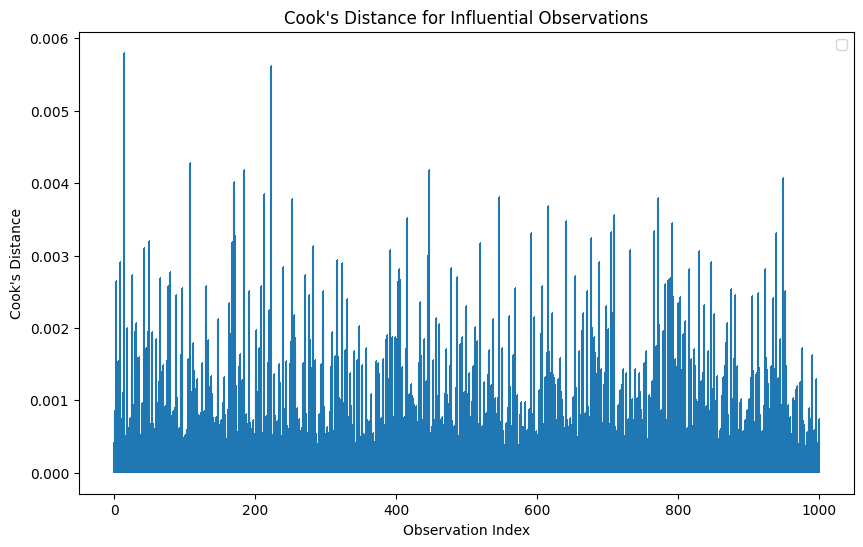

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# load dataset
treatment_df = pd.read_csv('patient_treatment.csv', sep='\t')

# create target variable - y and predictors - X
X = treatment_df[['age', 'sex', 'bmi', 'smoking', 'diabetes', 'adherence']]
y = treatment_df['outcome']

# add constant term
X = sm.add_constant(X)

# fit the GLM with binomial family
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# print summary
print(model.summary())

# calculate odds ratios and their 95% confidence intervals
odds_ratios = np.exp(model.params)
conf = np.exp(model.conf_int())
print("Odds Ratio:", odds_ratios)
print("95% Confidence Intervals", conf)

# print residual deviance and null deviance
print("Residual Deviance:", model.deviance)
print("Null Deviance:", model.null_deviance)


influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# plot cook's distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.title("Cook's Distance for Influential Observations")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()


#### GLM summary table
Based on the GLM summary table, the p value of age, sex, bmi, smoking and adherence are higher than 0.05 which suggest that these variables are not statistically significant. 

#### Model fit
- Pseudo R-squ. (CS):0.01974 which indicates the model only explains a small portion of the variance in the treatment outcomes.
- the Deviance and pearson chi-squared values indivcate the overall goodness of fit.

#### Odds ratios and 95% confidence intervals
- The odds ratios shows us the association between each predictor adn the outcome. The value above 1 indicate a positive association with treatment success. The value below 1 indicate a negative association with treatment success. 
- The 95% confidence intervals gives us the range within which the true odds ratio likely falls. 
- Age: The odds ratio is close to 1 which suggest a negligible effect. Based on the 95% confidence interval, this effect is likely not statistically significant. 
- Sex: The odds ratio indicate a negative association with treatment success. Based on the 95% confidence interval, this effect is likely not statistically significant.
- BMI: The odds ratio indicate a positive association with treatment success. Based on the 95% confidence interval, this effect is likely statistically significant.
- Smoking: The odds ratio indicate a negative association with treatment success. Based on the 95% confidence interval, this effect is likely statistically significant.
- Diabetes: The odds ratio indicate a negative association with treatment success. Based on the 95% confidence interval, this effect is likely statistically significant.
- Adherence: The odds ratio indicate a positive association with treatment success. Based on the 95% confidence interval, this effect is likely not statistically significant.
- These results suggest that while certain baseline characteristics like diabetes status and BMI can influence treatment effectiveness, other factors such as age, sex, and adherence may require further investigation or more data to clarify their roles. 

#### Residual and null deviance
based on the residual and null deviance,the residual deviance is only slightly lower than the null deviance, which indicates that the model does not substantially improve over a model with no predictors. 


#### Cook's Distance for Influential Observations
Based on the 'Cook's Distance for Influential Observations', most of the cook's distance values are quite low, uaually the threshold of 0.5 of 1, indicating that there are no highly influential points in the dataset. This suggests that no single observation is disproportionately affecting the model's predictions, which adds to the stability and reliability of the model.

## Machine Learning Tasks 

### 1. Build a prediction pipeline

In [ ]:

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# load dataset
treatment_df = pd.read_csv('patient_treatment.csv', sep='\t')

# 
X = treatment_df[['age', 'sex', 'bmi', 'smoking', 'diabetes', 'adherence']]
y = treatment_df['outcome']

# Identify numeric and categorical features
numeric_features = ['age', 'bmi', 'bp_systolic', 'cholesterol', 'heart_rate', 'adherence']
categorical_features = ['sex', 'smoking', 'diabetes', 'treatment']  # assuming these are binary categorical variables

# Preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])


# Create pipeline with specific components
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        penalty='l2',
        solver='lbfgs',
        max_iter=1000,
        class_weight='balanced'
    )
)


### 2. Validate model performance

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.66      0.54      0.60       185
           1       0.43      0.56      0.48       115

    accuracy                           0.55       300
   macro avg       0.55      0.55      0.54       300
weighted avg       0.57      0.55      0.55       300

Confusion Matrix:
[[100  85]
 [ 51  64]]


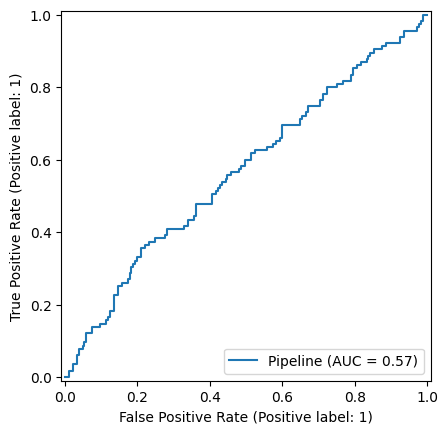

In [ ]:
from sklearn.model_selection import (
    train_test_split, 
    StratifiedKFold,
    cross_validate
)
from sklearn.metrics import (
    classification_report,
    RocCurveDisplay,
    confusion_matrix
)


# Stratified split for imbalanced data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    stratify=y,
    random_state=42
)

# Cross-validation with multiple metrics
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(
    pipeline,
    X_train, y_train,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'roc_auc']
)

# fit the model on training data
pipeline.fit(X_train, y_train)

# predict on the test set
y_pred = pipeline.predict(X_test)

# print classification report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# plot ROC curve
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title("ROC Curve")

#### Clasification report
- Accuracy: The model's overall accuracy is 55%, which is slightly better than random guessing but still relatively low. 
- In general, the model is not a good fit. 

#### Confusion matrix
- The model has a high number of false positives and false negatives, which impacts both classes' precision and recall. The relatively high count of false predictions suggests that the model struggles to accurately classify treatment outcomes.

#### ROC curve
- The AUC = 0.57 which indicate that the model has limited ability to differentiate between treatmet success and failure. 